# Diffraction Grating Lab: From Physics to Smartphone Dispersed Imaging to Astronomical Spectroscopy <br>
### C. Stubbs, March 2025 with assistance from Claude

## Introduction

In this lab, you'll explore how diffraction gratings work and how they're used in astronomical spectroscopy. You'll use a diffraction grating like the kind shown in Figure 1 to create some spectra, and make some measurements.

Our specific learning goals are to have students:
1. Understand and be able to explain how a diffraction grating works, including a quantitative analysis.
2. Gain some intuition for optical systems, and hands-on experience
3. Collect spectral data using a smartphone
4. Perform a rudimentary spectral extraction from a two-dimensional image
5. Make the connection between the physics of a diffraction grating and its application in astronomical instrumentation.

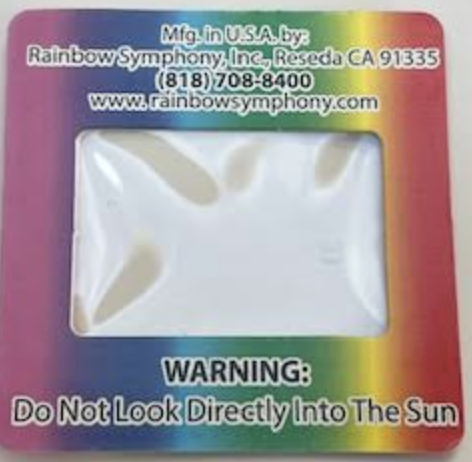

Figure 1. Slide-holder-mounted diffraction grating.

## Part 1: Diffraction Grating Theory

A diffraction grating uses constructive interference, and diffracts light according to

$$n\lambda = d\sin(\theta)$$

Where:
- $n$ is the diffraction order (0, $\pm$1, $\pm$2, ...)
- $\lambda$ is the wavelength of light
- $d$ is the grating spacing
- $\theta$ is the angle of diffraction

The principle is shown in Figure 2 below (from https://www.newport.com/n/diffraction-grating-physics?srsltid=AfmBOora1y1gseB7ihJYVRkZzr5sXNnTKocqJSsEwmNbE1fdASBsDBTb)

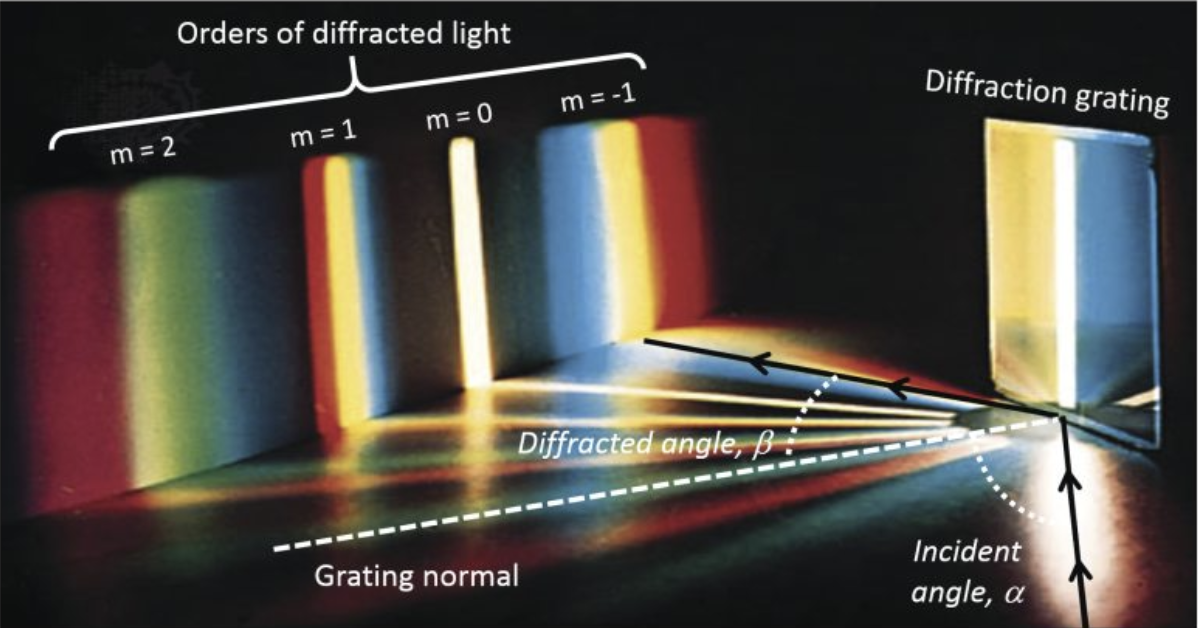



### Exercise 1: Diffraction Angle Expressions

**Task:** Write down the expression for the diffraction angle $\theta$ as a function of wavelength for first order ($n=1$) and second order ($n=2$) diffraction.

**Your answer:**

First order: $\theta = $

Second order: $\theta = $

## Part 3: Capturing Spectra

### Exercise 2: Smartphone Spectroscopy

**Procedure:**
1. Hold the diffraction grating in front of your phone camera. You can also tape it on with masking tape.
2. Point at different light sources (laser pointer, Xenon flashlight bulb)
3. Take photos showing the spectra. Try to line things up so the spectrum goes horizontally across your image.
4. Store your best image(s) to your laptop; the desktop is a good place for now. You should be able to mail yourself an image from your phone, then store it on your laptop, for example.
5. Running the next cell will let you select an image file to upload here for a quick analysis.

Scroll down to the bottom of the cell to select and upload a smartphone spectral image from your laptop.

Saving IMG_3689.jpg to IMG_3689.jpg


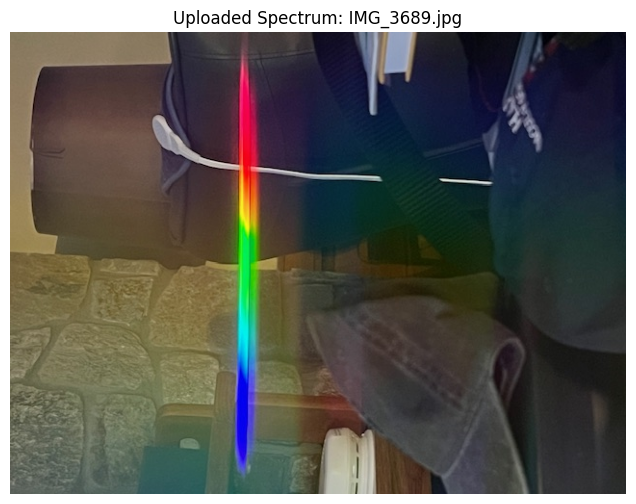

In [4]:
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image

# If you run this cell it will prompt you for the file you want to upload.
uploaded = files.upload()
filename = next(iter(uploaded))

# Display image
image = Image.open(filename)
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.title(f"Uploaded Spectrum: {filename}")
plt.axis('off')
plt.show()

## is your spectrum running horizonally across the image?
If not, execute the cell below to rotate it

Image '<PIL.MpoImagePlugin.MpoImageFile image mode=RGB size=640x480 at 0x793259871250>' rotated by 90 degrees and overwritten.


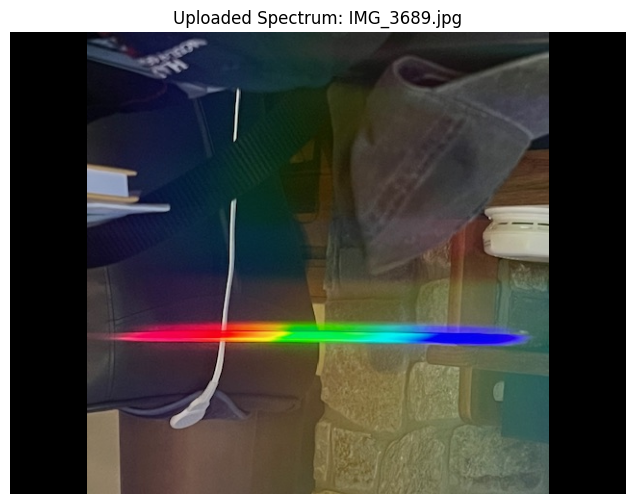

In [5]:
# ONLY RUN THIS CELL IF YOUR SPECTRUM IS VERTICAL AND NOT HORIZONTAL!

import numpy as np
from PIL import Image

def rotate_image(input_image, angle):
  """Rotates an image by a specified angle and overwrites the original file.

  Args:
    image_path: The path to the image file.
    angle: The angle of rotation in degrees.  Positive values rotate clockwise.
  """
  try:
    rotated_img = input_image.rotate(angle)

    print(f"Image '{image}' rotated by {angle} degrees and overwritten.")
  except FileNotFoundError:
    print(f"Error: Image array not found '{image}'")
  except Exception as e:
    print(f"An error occurred: {e}")

  return rotated_img

# Example usage (assuming image array is defined as in your previous code):
image=rotate_image(image, 90)  # Rotate by 90 degrees clockwise.  Change the number to change the rotation.
# To rotate counterclockwise use a negative angle. e.g., -90
# note this over-writes the previous array.

# Display image
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.title(f"Uploaded Spectrum: {filename}")
plt.axis('off')
plt.show()

### Exercise 4: Analyzing Spectral Images

We want to extract a one-dimensional spectrum, indexed by pixel in the detector, that contains the intensity of the light detected.

Consumer digital cameras are engineered to deliver images that work well with your eye's photoreceptors. You have three chemicals (opsins) in your retia that each convert selected wavelengths into neural signals that are sent to your brain. We'll call them Red, Blue, and Green (did you know there is a species of shrimp that has 13 distinct wavelength-selective opsins?).

The pixels in your phone's camera are similar; there are pixels that have R, G, and B filters so that the camera creates a 2-d data array for each of those passbands. The pixel layout is shown in Figure 3.

You should think of a set of four filterd *bggr* subpixels as making up one 'superpixel' that has three distinct flux measurements.  

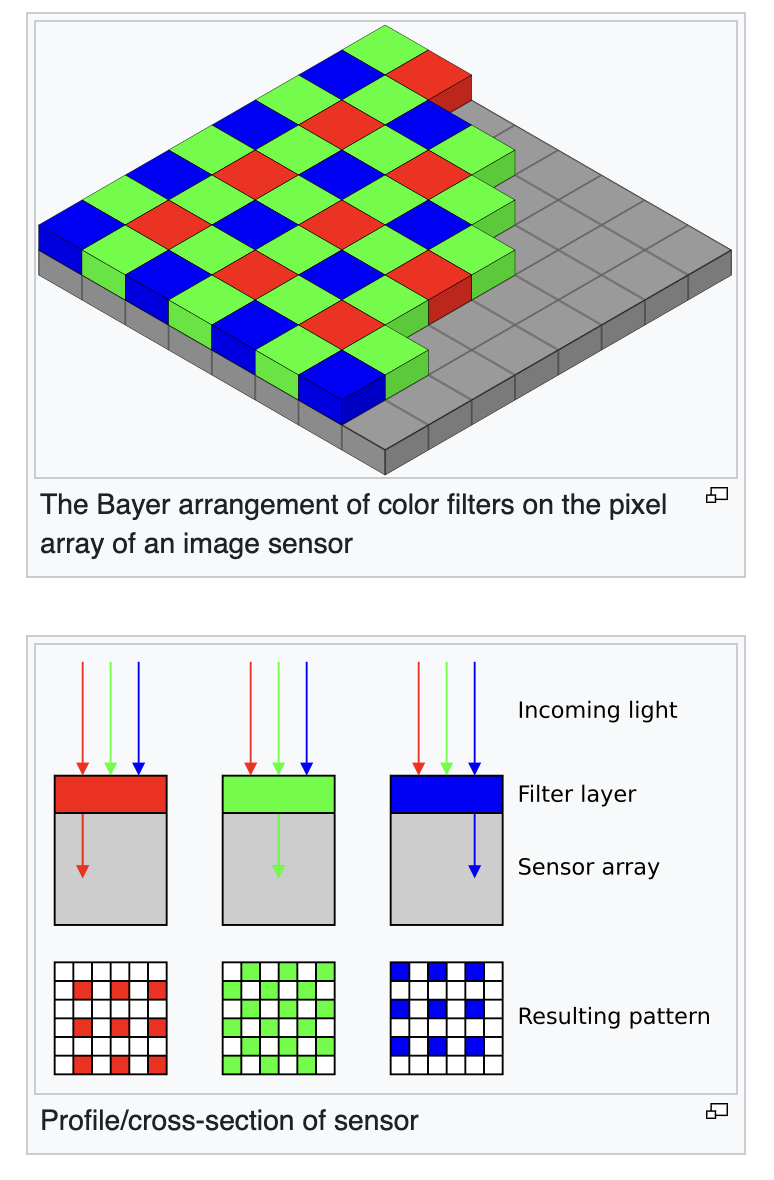

Figure 3. Three-color "Bayer" pixel layout for a digital camera. From Wikipedia. You should think of the trio of intensity matrices as making up a 'data cube' that is Nrows x Ncolumns x 3, with a plane for each color.

## Spectral extraction
So our goal is to (crudely, for this exercise) extract a spectrum that is a data vector that contains the detected intensity.
We'll do this by defining a rectangle on the image, specified by a central row and a row range. You can edit those values in the next compuational cell.

We will extract a postage stamp sub-array around the designated row of interest, and then 'collapse' each r,g,b subarray into a data vector per color, called r_sum, g_sum, and b_sum, by adding up the numbers along columns. We'll then add all three color-vectors into a single total flux vector (where each element's position along the vector corresponds a column on the sensor) we'll call allflux.

This process is illustrated in Figure 4.

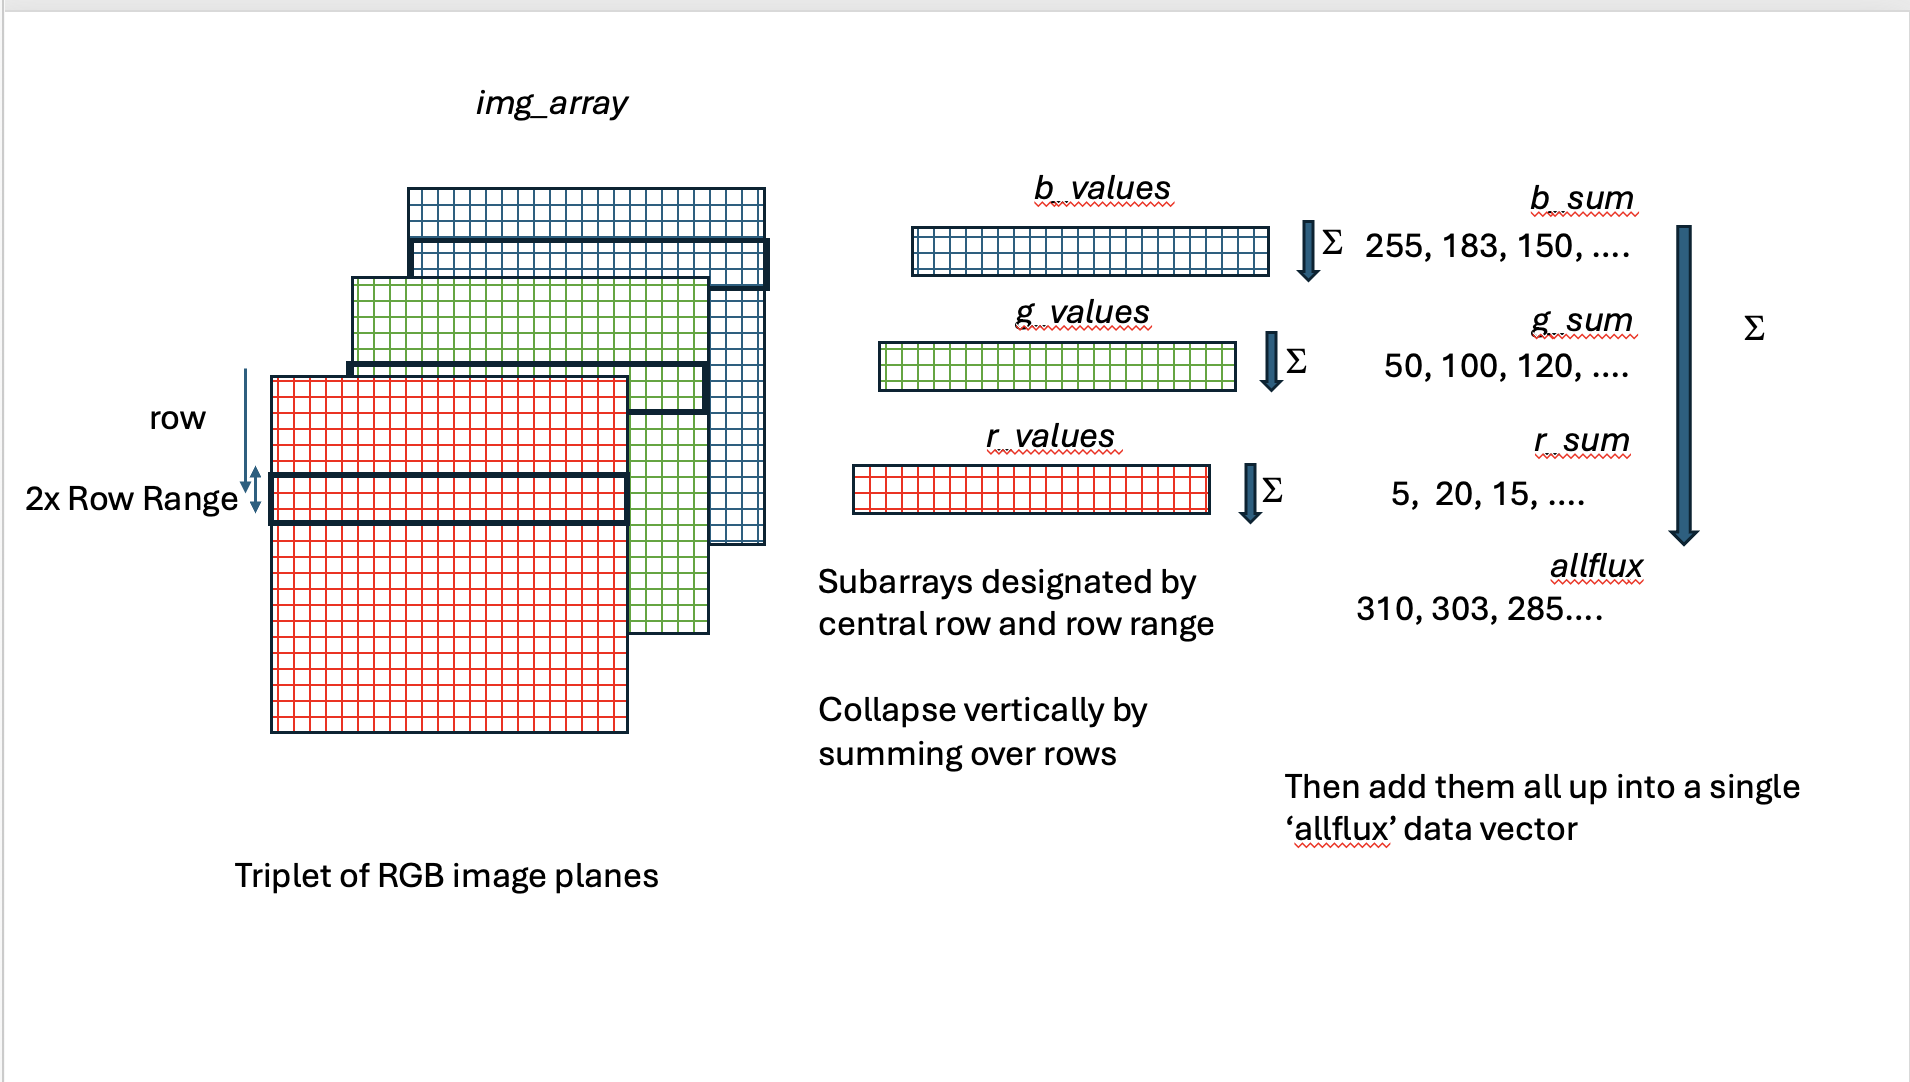

Figure 4. An illustration of the process of extracting a data vector that is a 1-d spectrum.

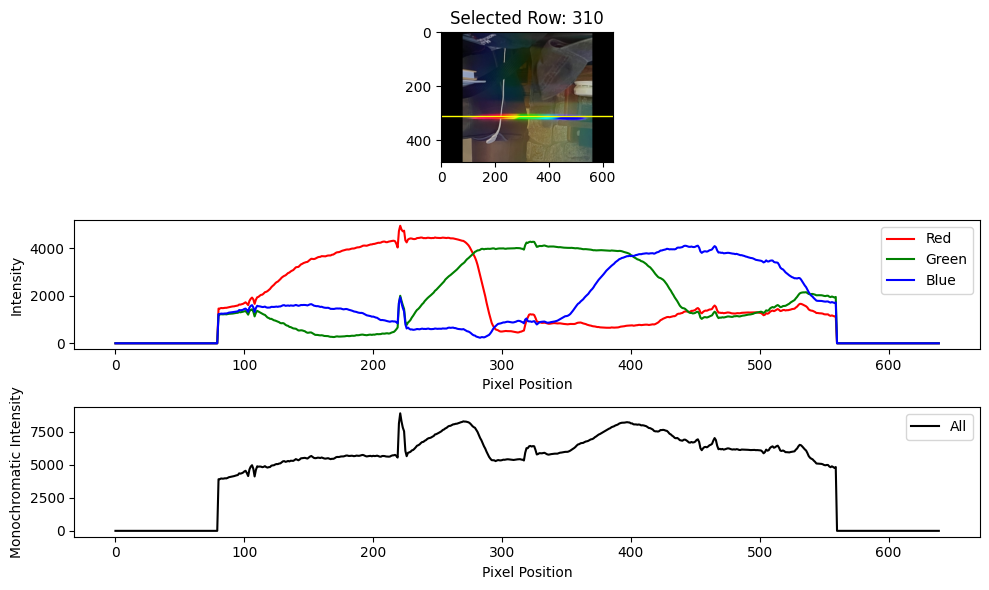

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Convert from an image to a numerical Numpy array. This produces a data 'cube' comprising 3 matrices, one plane
# each for red, green, and blue intensity in each pixel.

img_array = np.array(image)

# Choose a row to analyze (middle of image by default)
# you could pick another row here, just make it an integer.
# row=0 is the top of the image.

# start at midpoint, remember row=0 is at the top
row = img_array.shape[0] // 2

# uncomment this line and enter the row around which you want the specrtrum extracted.
row = 310

rowrange=10 # this determines the extent of rectangular block to extract, which will be twice this size

# Extract RGB values along the selected rectangle. each of these is a 2-d data array cutout
r_values = img_array[row-rowrange:row+rowrange, :, 0] if img_array.ndim == 3 else img_array[row, :]
g_values = img_array[row-rowrange:row+rowrange, :, 1] if img_array.ndim == 3 and img_array.shape[2] >= 2 else np.zeros_like(r_values)
b_values = img_array[row-rowrange:row+rowrange, :, 2] if img_array.ndim == 3 and img_array.shape[2] >= 3 else np.zeros_like(r_values)

# sum into a single data vector for each color
# these image intensity numbers are stored as 8 bit integers, and max out at 255.
# to get the full fluxes we need to change the representation to floating point
# to avoid integer truncation.

# each of these is a 1-d vector that 'collapses' the spectrum into a single row

r_sum = np.sum(r_values.astype(float), axis=0)
g_sum = np.sum(g_values.astype(float), axis=0)
b_sum = np.sum(b_values.astype(float), axis=0)

# now add up all three colors to get the total flux
allflux=r_sum+g_sum+b_sum

# Plots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 6))
ax1.imshow(img_array)
ax1.axhline(y=row, color='yellow', linewidth=1)
ax1.set_title(f"Selected Row: {row}")

ax2.plot(r_sum, 'r-', label='Red')
ax2.plot(g_sum, 'g-', label='Green')
ax2.plot(b_sum, 'b-', label='Blue')

ax2.set_xlabel('Pixel Position')
ax2.set_ylabel('Intensity')
ax2.legend()
ax3.plot(allflux, 'k-', label='All')
ax3.set_xlabel('Pixel Position')
ax3.set_ylabel('Monochromatic Intensity')
ax3.legend()
plt.tight_layout()
plt.show()

## Part 4: Connection to Astronomical Spectroscopy

Diffraction gratings are the 'dispersive' optical element in most contemporary astronomical spectrographs. The term 'dispersion' indicates an intentional wavelength-depedence of the optical path. The conceptual layout of a single-object astronomical spectrograph is shown in Figure 5.

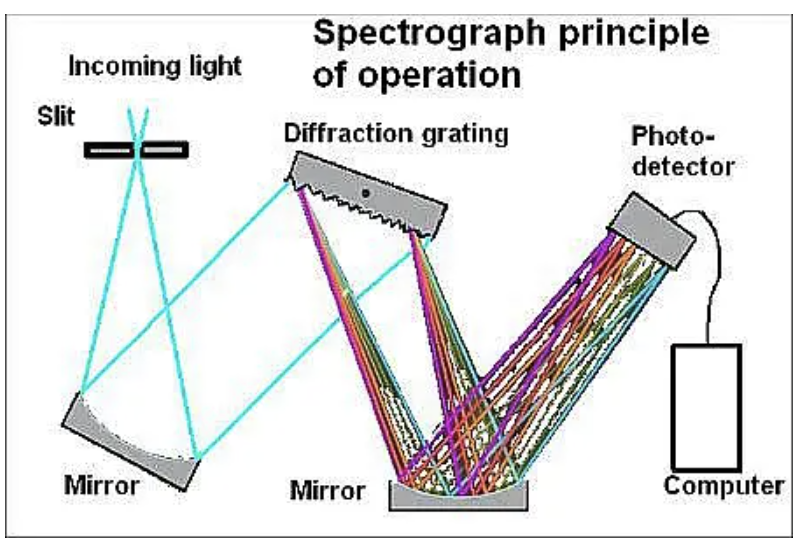

Figure 5. Conceptual Layout of an spectrograph mounted on a telescope. The telescope takes light from the sky and focuses it onto the slit. From https://www.testandmeasurementtips.com/basics-of-spectrometers-and-spectroscopy/.

The telescope brings light from a source to a focus. For an imaging system we use the two dimensions on the detector placed at the telescope focus to map the angle of arrival of light from the sky onto position on the imaging sensor.

For a long-slit spectrograph, one dimension on the spectrograph sensor encodes wavelength and the other direction encodes position on the sky. That means we need to somehow eliminate one spatial degree of freedom. This is done by placing a long slit at the focus of the telescope.

The elements in the light path shown in Figure 3 comprise:
1. The telescope, that focuses light from the sky onto the focal surface of the telescope optical system.
2. A slit that restrict the light to a narrow 1-d portion of the sky.
3. A 'collimator' that has a focal length equal to its distance from the slit. This makes light from a single point source within the slit emerge as parallel rays. That's important for the grating to work optically, since n$\lambda$=$d \sin(\theta)$ assumes parallel incoming rays. That's the first mirror shown in figure 3.
4. The diffraction grating, operating either in reflection or in transmission. Light of different wavelengths emerge at diferent angles. In the image above it's a reflection grating.
5. The 'spectrograph camera' that takes those rays and maps their angle of arrival (which encodes wavelength, remember) onto position on the spectrograph detector. In the image above this is done by a concave mirror.
6. The spectropgrah's detector and associated readout system.




###Our smartphone implementation
Our exercise today makes the approximation that the source is far enough away that the light that passes through the grating and into the camera is close to being collimated, i.e. nearly parallel rays.

1. In our implementation, what plays the role of the second mirror in Figure 5?




<br><br><br>

2. Make an estimate of the angular range of the light that enters the camera lens. Be sure you get the units right! To what should we compare this angular span?

<br><br><br>


3. Can you get the AI tool Gemini to make you a new notebook cell that computes the difference of angles at which light at 400 nm and 800 nm emerge from the grating? How does this relate to question (2) above? You can get that started by clicking on the "+ Code" icon above to generate a new cell below this one, and then provide a prompt after cliking on the underlined "generate" word. It's an iterative process and it might take you a few tries to get what you want. You might want to describe a few-step process that starts with having it print out the value of $d$, to be sure it stored the correct value from the first computational cell in this notebook.



### Exercise 6: Astronomical Applications of Spectroscopy

Spectroscopy allows astronomers to determine:
- Chemical composition of stars, exoplanet atmospheres, and galaxies,
- Temperatures of astronomical objects,
- Classification of sources, by identifying spectral features,
- Radial velocities of stars (through Doppler shifts), to look for exoplants
- Star formation rates in galaxies, by looking the intensity of emission lines
- The expansion rate of the universe, by measuring redshifts vs. distance.

**Questions:**
1. How might a star's spectrum differ from the spectra you observed?
2. If a spectral line normally at 500 nm appears at 505 nm in a galaxy's spectrum, what is the galaxy's redshift?
3. Why might astronomers need diffraction gratings with different line spacings? What are the tradeoffs?
4. How do you think you might improve the spectral-extraction process?
5. How could you calibrate the relationship between detector pixels and wavelength?

**Your answers:**

1.



2.



3.


4.



5.



## Conclusion

You've explored diffraction gratings and their applications in astronomy. You've:

1. Understood the physics behind diffraction gratings
2. Measured the properties of your grating
3. Captured and analyzed spectra of light sources
4. Explored how the image on a detector is converted into a 1-d spectrum.
5. Connected this to how astronomers study the universe


#Extra Credit Portion, only if you have time!

Here are some things to ponder, or to try out. Enter your responses below whatever questions you choose to answer.

1. Our smartphone images contain the superposition of the background scene (in both m=0 and m=+-1 order) and the spectrum of interest. Describe how you might correct for this and extract a cleaner spectrum. See if you can make a new cell that does this 'sky subtraction' task.

<br><br><br>



2. Does your grating work in reflection as well as in transmission? Can you test that emperically?


<br><br><br>

3. And here's the real zinger:  For a laser source why are there only odd-order bright spots, corresponding to m=0, -1, and +1, that appear? Why aren't there second-order bright spots for m=-2 and m=+2 equidistant from the first order spot?? And what about even higher orders? Where did all that light go?
What do you conclude from this? You might try AI as a thought partner on resolving this apparent conundrum. (Hint- ask AI about Ronchi gratings).



<br><br><br>



